![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [4]:
filename_features = r"C:\Users\Bill_\Desktop\Projetos\EBAC\DataScience\Modulo 27 - PCA\UCI HAR Dataset\features.txt"
filename_labels = r"C:\Users\Bill_\Desktop\Projetos\EBAC\DataScience\Modulo 27 - PCA\UCI HAR Dataset\activity_labels.txt"

filename_subtrain = r"C:\Users\Bill_\Desktop\Projetos\EBAC\DataScience\Modulo 27 - PCA\UCI HAR Dataset\train\subject_train.txt"
filename_xtrain = r"C:\Users\Bill_\Desktop\Projetos\EBAC\DataScience\Modulo 27 - PCA\UCI HAR Dataset\train\X_train.txt"
filename_ytrain = r"C:\Users\Bill_\Desktop\Projetos\EBAC\DataScience\Modulo 27 - PCA\UCI HAR Dataset\train\y_train.txt"

filename_subtest = r"C:\Users\Bill_\Desktop\Projetos\EBAC\DataScience\Modulo 27 - PCA\UCI HAR Dataset\test\subject_test.txt"
ffilename_xtest = r"C:\Users\Bill_\Desktop\Projetos\EBAC\DataScience\Modulo 27 - PCA\UCI HAR Dataset\test\X_test.txt"
filename_ytest = r"C:\Users\Bill_\Desktop\Projetos\EBAC\DataScience\Modulo 27 - PCA\UCI HAR Dataset\test\y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

C:\Users\Bill_\AppData\Local\Temp\ipykernel_10112\2810470092.py:12: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
C:\Users\Bill_\AppData\Local\Temp\ipykernel_10112\2810470092.py:15: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
C:\Users\Bill_\AppData\Local\Temp\ipykernel_10112\2810470092.py:19: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)


## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

In [42]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_test_pad = pd.DataFrame(X_test).apply(padroniza, axis=0)
X_train_pad.head()

CPU times: total: 484 ms
Wall time: 477 ms


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.200628,-0.063678,-0.419600,-0.868755,-0.939377,-0.737479,-0.859758,-0.938955,-0.766385,-0.855978,...,-0.795305,0.025958,-0.276380,-0.360579,0.062935,-0.778374,-0.026079,-0.687172,0.407918,-0.007567
1,0.055944,0.031484,-0.253891,-0.875366,-0.923839,-0.849247,-0.868472,-0.921936,-0.848870,-0.871300,...,0.130605,-0.897296,-0.767938,0.133002,-0.021460,-1.218722,1.484369,-0.694091,0.409089,0.007875
2,0.073510,-0.043414,-0.076289,-0.868980,-0.907698,-0.893724,-0.863078,-0.898793,-0.896640,-0.863264,...,1.152257,-0.260860,-0.438286,-0.377815,0.391949,0.151197,1.704085,-0.702191,0.410260,0.026501
3,0.066691,-0.208407,-0.249695,-0.870566,-0.939959,-0.921743,-0.864445,-0.938060,-0.925216,-0.863264,...,1.112694,0.591005,0.463123,-0.135016,-0.033635,1.037781,-1.002951,-0.701636,0.414622,0.031712
4,0.030467,0.027585,-0.109840,-0.875128,-0.934815,-0.921281,-0.867325,-0.931726,-0.927965,-0.870201,...,-0.149567,-0.138505,-0.240296,0.340383,0.268468,1.125841,-1.276196,-0.700104,0.425434,0.045222


In [30]:
# Declarando o PCA e alimentando o algoritimo com o X_train
pca = PCA().fit(X_train)

# Obtendo a variância explicada acumulada
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

In [31]:
# Com essa variável criada já da para ver que chega em 90% da variância explicada com 34 componentes
explained_variance_ratio_cumsum

array([0.6255444 , 0.67467463, 0.7158893 , 0.73463886, 0.75158746,
       0.76430816, 0.77607501, 0.78676474, 0.79645854, 0.80503872,
       0.81266174, 0.81938619, 0.82518039, 0.8307592 , 0.83574845,
       0.84049783, 0.84516983, 0.84948601, 0.85374316, 0.85784711,
       0.86178714, 0.86554023, 0.8690645 , 0.8724581 , 0.87577949,
       0.87897378, 0.88199157, 0.88490939, 0.88780509, 0.89062437,
       0.89339141, 0.89602536, 0.89857843, 0.90093709, 0.90324361,
       0.90548009, 0.90770957, 0.90981233, 0.91189626, 0.913944  ,
       0.91587257, 0.91776136, 0.91957316, 0.92136789, 0.92309117,
       0.92469319, 0.92626358, 0.92782986, 0.92935955, 0.93086307,
       0.93231424, 0.93372065, 0.9350889 , 0.93635748, 0.93760754,
       0.93880496, 0.93998616, 0.94113611, 0.94226693, 0.94336363,
       0.94444067, 0.94548967, 0.94652861, 0.94754335, 0.94853487,
       0.94950512, 0.95045922, 0.95137385, 0.95226151, 0.95313752,
       0.95399025, 0.95481929, 0.95564105, 0.95644739, 0.95722

In [32]:
i = 0
n = 0
while i < 0.9:
    i = explained_variance_ratio_cumsum[n]
    n += 1

print(f"Número de componentes para explicar 90% da variância é de: {n} componentes")

Número de componentes para explicar 90% da variância é de: 34 componentes


In [33]:
# Depois percebi que dava pra pegar o número de componentes dessa maneira também que é bem mais enxuta.
n_components_90 = np.argmax(explained_variance_ratio_cumsum >= 0.9) + 1
n_components_90

34

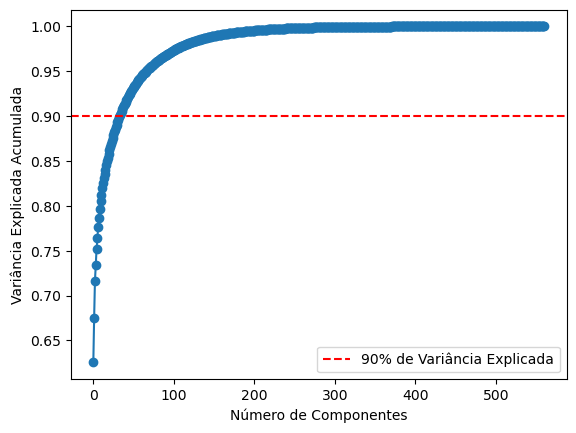

In [34]:
# Gráfico simplificado da variância explicada com uma linha no 90%
plt.plot(explained_variance_ratio_cumsum, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.axhline(0.9, color='red', linestyle='--', label='90% de Variância Explicada')
plt.legend()
plt.show()

#### Aqui foi calculado quanto que cada componente contribui separadamente. O primeiro componente contribui em 62% e o segundo já tem uma queda muito grande para 4%.

In [35]:
componente_contribution = []
for n in range(len(explained_variance_ratio_cumsum)):
    if n == 0: # Fiz esse IF para não pegar posição 0-1, a primeira posição já é o resultado
        componente_contribution.append(explained_variance_ratio_cumsum[n])
    else: # Aqui é calculado a posição atual menos a posição anterior, que resulta no valor real de contribuição
        componente_contribution.append(explained_variance_ratio_cumsum[n] - explained_variance_ratio_cumsum[n-1])
        
componente_contribution

[0.6255443998293541,
 0.04913022721944149,
 0.04121467452980454,
 0.018749561221530375,
 0.016948599854391566,
 0.012720692892865149,
 0.0117668513643715,
 0.010689731643445555,
 0.00969379778892121,
 0.00858018171139363,
 0.007623019108188855,
 0.006724456605154749,
 0.005794195957186554,
 0.0055788063792773235,
 0.004989257301254546,
 0.004749376261358074,
 0.004672001094622069,
 0.004316178601290743,
 0.004257151800135306,
 0.0041039503860419435,
 0.003940024014121524,
 0.0037530931586585714,
 0.0035242748817561065,
 0.0033935942549918607,
 0.0033213899775373923,
 0.0031942878649444673,
 0.0030177914899508496,
 0.002917825745477609,
 0.0028956995614549674,
 0.0028192779470841423,
 0.002767041477783838,
 0.002633950522345496,
 0.002553066865629172,
 0.0023586588275434917,
 0.0023065230352480315,
 0.002236481678953184,
 0.0022294813338601394,
 0.00210275983770436,
 0.0020839291652158254,
 0.0020477375238230344,
 0.00192856457384194,
 0.00188879622733662,
 0.0018118025879386712,
 0.001

In [38]:
%%time
# Treinando para captar as 10 features que mais explicam a variábilidade
pc_10 = PCA(n_components=10).fit(X_train)

# Usando as features captadas para gerar um novo conjunto com apenas 10 colunas
X_train_pca10 = pc_10.transform(X_train)
X_test_pca10 = pc_10.transform(X_test)

# Criando um modelo de classificação árvore usando o conjunto de dados explicados por 10 features
clf_pca = DecisionTreeClassifier(random_state=1)
clf_pca.fit(X_train_pca10, y_train)

# Fazendo as predições de treino e teste
y_pred_train_pca10 = clf_pca.predict(X_train_pca10)
y_pred_test_pca10 = clf_pca.predict(X_test_pca10)

# Medindo a acurácia após obter as predições usando apenas 10 features
accuracy_train_pca10 = accuracy_score(y_train, y_pred_train_pca10)
accuracy_test_pca10 = accuracy_score(y_test, y_pred_test_pca10)

print("Resultados obtidos usando apenas 10 features de maior importância captado pelo PCA:")
print(f"Acurácia usando os dados de treino: {accuracy_train_pca10}")
print(f"Acurácia usando os dados de teste (não vistos): {accuracy_test_pca10}")

Resultados obtidos usando apenas 10 features de maior importância captado pelo PCA:
Acurácia usando os dados de treino: 1.0
Acurácia usando os dados de teste (não vistos): 0.7926705123854768
CPU times: total: 2.22 s
Wall time: 426 ms


#### Agora será feito o modelo padronizado (z-score), uma surpresa ter o número de componentes tão maior quanto no exemplo anterior.

In [39]:
# Declarando o PCA e alimentando o algoritimo com o X_train_pad
pca = PCA().fit(X_train_pad)

# Obtendo a variância explicada acumulada
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Obtendo o número de componentes até que dê 90% de variabilidade explicada
n_components_90 = np.argmax(explained_variance_ratio_cumsum >= 0.9) + 1
n_components_90

63

#### Comparando com os valores anteriores, o bom sinal é que a diferença diminuiu um pouco entre os componentes, apesar do primeiro componente ainda se sobresair bastante dos demais.

In [40]:
componente_contribution = []
for n in range(len(explained_variance_ratio_cumsum)):
    if n == 0: # Fiz esse IF para não pegar posição 0-1, a primeira posição já é o resultado
        componente_contribution.append(explained_variance_ratio_cumsum[n])
    else: # Aqui é calculado a posição atual menos a posição anterior, que resulta no valor real de contribuição
        componente_contribution.append(explained_variance_ratio_cumsum[n] - explained_variance_ratio_cumsum[n-1])
        
componente_contribution

[0.5078117229128631,
 0.06580680266812833,
 0.028064367747405727,
 0.025039527454748467,
 0.01888285014742619,
 0.017240064161301083,
 0.013710114685819397,
 0.011990776796272806,
 0.009958595109471502,
 0.009650865903470862,
 0.0086005164898183,
 0.008002809498241503,
 0.007639963685968976,
 0.006453289239666704,
 0.006323243464447348,
 0.005997220904127021,
 0.0058675030202698375,
 0.005754073920092528,
 0.00567921046996922,
 0.005272957788359123,
 0.005003629248268471,
 0.004884084061034466,
 0.004782057840248322,
 0.004685629299652216,
 0.004492892601815179,
 0.004210272427941586,
 0.004179786815751263,
 0.004055703692216861,
 0.0038852416824878278,
 0.003870180435570192,
 0.0036595887791969206,
 0.0035455338067266196,
 0.003479426063832669,
 0.0033718710936077034,
 0.0032967699873032164,
 0.003282150498954528,
 0.003205294778807266,
 0.0029561493878377254,
 0.0028672241527630815,
 0.0028507454817283673,
 0.002687663235107829,
 0.002656198586148961,
 0.0026340598857348407,
 0.00258

#### Exatamente a mesma árvore criada anteriormente, porém usando os dados padronizados por X_train_pad.

In [44]:
%%time
# Treinando para captar as 10 features que mais explicam a variábilidade
pc_10 = PCA(n_components=10).fit(X_train_pad)

# Usando as features captadas para gerar um novo conjunto com apenas 10 colunas
X_train_pca10 = pc_10.transform(X_train_pad)
X_test_pca10 = pc_10.transform(X_test_pad)

# Criando um modelo de classificação árvore usando o conjunto de dados explicados por 10 features
clf_pca = DecisionTreeClassifier(random_state=1)
clf_pca.fit(X_train_pca10, y_train)

# Fazendo as predições de treino e teste
y_pred_train_pca10 = clf_pca.predict(X_train_pca10)
y_pred_test_pca10 = clf_pca.predict(X_test_pca10)

# Medindo a acurácia após obter as predições usando apenas 10 features
accuracy_train_pca10 = accuracy_score(y_train, y_pred_train_pca10)
accuracy_test_pca10 = accuracy_score(y_test, y_pred_test_pca10)

print("Resultados obtidos usando apenas 10 features de maior importância captado pelo PCA:")
print(f"Acurácia usando os dados de treino: {accuracy_train_pca10}")
print(f"Acurácia usando os dados de teste (não vistos): {accuracy_test_pca10}")

Resultados obtidos usando apenas 10 features de maior importância captado pelo PCA:
Acurácia usando os dados de treino: 1.0
Acurácia usando os dados de teste (não vistos): 0.7451645741431965
CPU times: total: 2.09 s
Wall time: 369 ms


## Conclusões

#### Foi necessário padronizar também os dados de teste para comparação da árvore. Esse conjunto de treino tende a chegar em 100% com muita facilidade nos conjuntos de treino e seria necessário usar um modelo mais robusto como um Random Forest junto com cross validation e grid-search na escolha dos hyperparametros, para assim melhorar os resultados do teste. 

#### A comparação dos resultados não ficaram muito evidêntes para mim, o resultado padronizado foi inferior em cerca de 5% que o resultado anterior, talvez pelo uso de muitas variáveis que não seriam necessárias, pois o primeiro modelo usou bem menos features para chegar a mesma variábilidade explicada.